<h1>Metodo de Maxima Verossimilhança usando Espectro de Potência</h1>
<h3>Aluno:Matheus Vitor, Astroinformática 2021<h3>

Nessa etapa utilizaremos uma simulação de um catalogo de objetos gerados a partir de um modelo de universo baseado nos parametros obtidos pelos resultados de 2018 do Planck. 

In [1]:
# importando o modulo classy 
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from classy import Class 
from math import pi
from nbodykit.lab import *
from nbodykit import style, setup_logging
from nbodykit.lab import cosmology
%config InlineBackend.figure_format = 'retina'
from scipy.interpolate import InterpolatedUnivariateSpline
plt.style.use(style.notebook)
setup_logging()

In [18]:
redshift = 0.01
cosmo = cosmology.Cosmology(h=0.67556, T0_cmb=2.7255, Omega0_b = 0.0483,Omega0_cdm = 0.2638,n_s = 0.9619)
Plin = cosmology.LinearPower(cosmo, redshift, transfer='EisensteinHu')
b1 = 2.0

cat = LogNormalCatalog(Plin=Plin, nbar=3e-4, BoxSize=1380., Nmesh=256, bias=b1, seed=42)

[ 000251.36 ]   0: 12-16 08:44  LogNormalCatalog INFO     Growth Rate is 0.530288
[ 000251.36 ]   0: 12-16 08:44  LogNormalCatalog INFO     Generating whitenoise
[ 000256.04 ]   0: 12-16 08:44  LogNormalCatalog INFO     Write noise generated
[ 000258.40 ]   0: 12-16 08:44  LogNormalCatalog INFO     Displacement computed in fourier space
[ 000259.18 ]   0: 12-16 08:44  LogNormalCatalog INFO     Overdensity computed in configuration space: std = 1.6193509580711292
[ 000261.46 ]   0: 12-16 08:44  LogNormalCatalog INFO     Displacement computed in configuration space: std = [5.724252523741979, 5.720849490808543, 5.824959803102822]
[ 000261.47 ]   0: 12-16 08:44  LogNormalCatalog INFO     gaussian field is generated
[ 000261.77 ]   0: 12-16 08:44  LogNormalCatalog INFO     Lognormal transformation done
[ 000263.94 ]   0: 12-16 08:44  LogNormalCatalog INFO     Poisson sampling done, total number of objects is 787937
[ 000270.78 ]   0: 12-16 08:44  LogNormalCatalog INFO     catalog produced. 

In [19]:
# add RSD
line_of_sight = [0,0,1]
cat['RSDPosition'] = cat['Position'] + cat['VelocityOffset'] * line_of_sight

In [20]:
# convert to a MeshSource, using TSC interpolation on 256^3 mesh
mesh = cat.to_mesh(window='tsc', Nmesh=256, compensated=True, position='RSDPosition')

/home/matheus/.local/lib/python2.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: The window argument is deprecated. Use `resampler=` instead
  


[ 000272.76 ]   0: 12-16 08:44  CatalogMesh     INFO     Chunk 0 ~ 4194304 / 787937 
[ 000273.33 ]   0: 12-16 08:44  CatalogMesh     INFO     painted 787937 out of 787937 objects to mesh
[ 000273.34 ]   0: 12-16 08:44  CatalogMesh     INFO     painted 787937 out of 787937 objects to mesh
[ 000273.34 ]   0: 12-16 08:44  CatalogMesh     INFO     mean particles per cell is 0.0469647
[ 000273.34 ]   0: 12-16 08:44  CatalogMesh     INFO     sum is 787937 
[ 000273.37 ]   0: 12-16 08:44  CatalogMesh     INFO     normalized the convention to 1 + delta


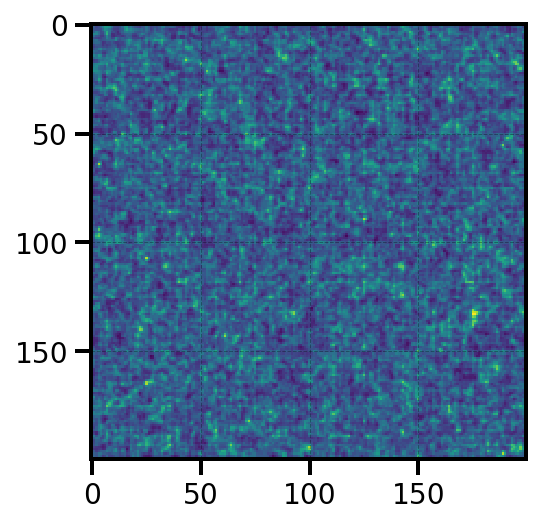

In [21]:
plt.imshow(mesh.preview(axes=[0,1], Nmesh=200))

In [22]:
r = FFTPower(mesh, mode='1d', dk=0.005, kmin=0.01)

[ 000283.55 ]   0: 12-16 08:44  CatalogMesh     INFO     Chunk 0 ~ 4194304 / 787937 
[ 000284.19 ]   0: 12-16 08:44  CatalogMesh     INFO     painted 787937 out of 787937 objects to mesh
[ 000284.20 ]   0: 12-16 08:44  CatalogMesh     INFO     painted 787937 out of 787937 objects to mesh
[ 000284.20 ]   0: 12-16 08:44  CatalogMesh     INFO     mean particles per cell is 0.0469647
[ 000284.20 ]   0: 12-16 08:44  CatalogMesh     INFO     sum is 787937 
[ 000284.22 ]   0: 12-16 08:44  CatalogMesh     INFO     normalized the convention to 1 + delta
[ 000284.65 ]   0: 12-16 08:44  CatalogMesh     INFO     field: (LogNormalCatalog(seed=42, bias=2) as CatalogMesh) painting done


In [23]:
Pk = r.power

(0.01, 0.6)

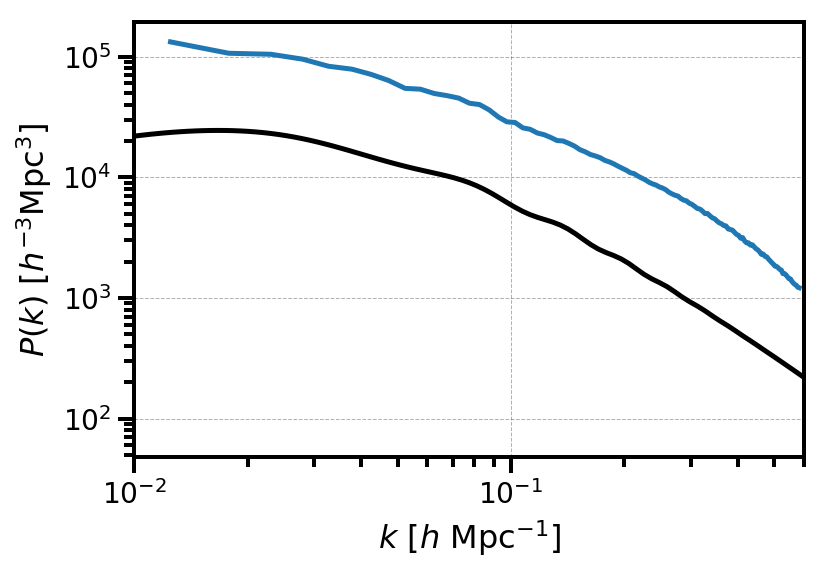

In [24]:
# print the shot noise subtracted P(k)
k = np.logspace(-2, 0, 100)
plt.loglog(Pk['k'], Pk['power'].real - Pk.attrs['shotnoise'])
plt.loglog(k, Plin(k), c='k')

# format the axes
plt.xlabel(r"$k$ [$h \ \mathrm{Mpc}^{-1}$]")
plt.ylabel(r"$P(k)$ [$h^{-3}\mathrm{Mpc}^3$]")
plt.xlim(0.01, 0.6)

In [25]:
power = Pk['power'].real - Pk.attrs['shotnoise']
Knovo = Pk['k']
print(type(power))
print(type(Knovo))
import scipy 

<type 'numpy.ndarray'>
<type 'numpy.ndarray'>


In [26]:
Pknovo = scipy.interpolate.interp1d(Knovo, power)

(0.01, 0.6)

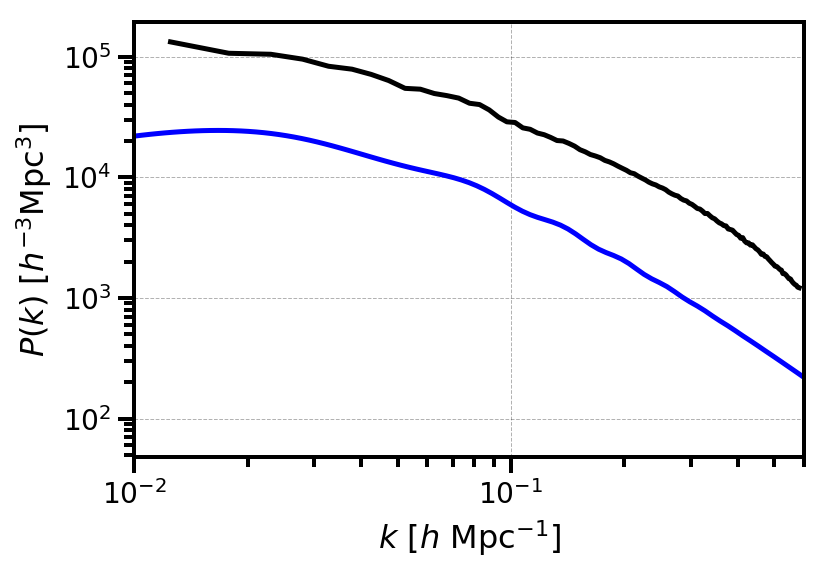

In [27]:
# print the shot noise subtracted P(k)
k = np.logspace(-2, 0, 100)
plt.loglog(Pk['k'], Pk['power'].real - Pk.attrs['shotnoise'] ,c='k')
plt.loglog(k, Plin(k), c='b')
#plt.loglog(Knovo, Pknovo(Knovo), c='r')

# format the axes
plt.xlabel(r"$k$ [$h \ \mathrm{Mpc}^{-1}$]")
plt.ylabel(r"$P(k)$ [$h^{-3}\mathrm{Mpc}^3$]")
plt.xlim(0.01, 0.6)

In [28]:
def NewSigma8(Pk, k,r=8, kmin=1e-5, kmax=1e1):
    import mcfit
    from scipy.interpolate import InterpolatedUnivariateSpline as spline

    k = numpy.logspace(numpy.log10(kmin), numpy.log10(kmax), len(Pk))
    #Pk = self(k)
    R, sigmasq = mcfit.TophatVar(k, lowring=True)(Pk, extrap=True)
    return spline(R, sigmasq)(r)**0.5

In [29]:
Nbins = 20 
SigmaMesh=NewSigma8(power,Knovo)
print(SigmaMesh)
len(power)

1.0598402722397111


115

In [30]:
OmegaB = np.linspace(0.011, 0.06, Nbins)
logL = np.empty(Nbins)
sigmaSimulados = np.empty(Nbins)
for m in range(Nbins):
    cosmo = cosmology.Cosmology(h=0.67556, T0_cmb=2.7255, Omega0_b = OmegaB[m],Omega0_cdm = 0.2638,n_s = 0.9619)
    Plin = cosmology.LinearPower(cosmo, redshift, transfer='CLASS')
    sigmaSimulados[m] = Plin.sigma_r(r=8)
    ErroSigma = Plin.sigma_r(r=8)/10
    logL[m] =  -np.sum((0.5 * ((Plin.sigma_r(r=8) - SigmaMesh ) / ErroSigma) ** 2)) 

O valor de Omega Barions que melhor ajusta os dados é [0.011]
E o besfit de sigma8 é [0.96622217]


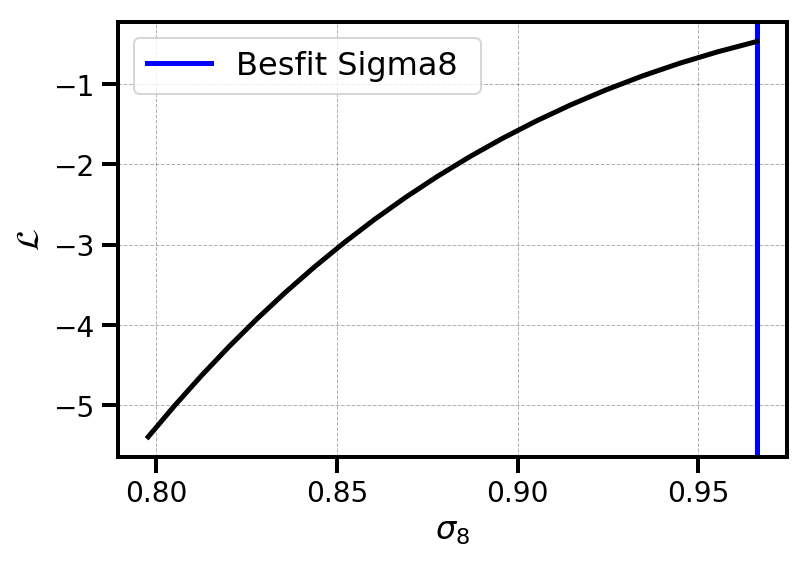

In [31]:
#Buscando qual foi o valor de OmegaB que determinou o máximo da Likelihood 
loc = np.where(logL == np.max(logL))
#print(loc)
#print(sigmaSimulados[loc])
print("O valor de Omega Barions que melhor ajusta os dados é {}".format(OmegaB[loc]))
print("E o besfit de sigma8 é {}".format(sigmaSimulados[loc]))
plt.axvline(x = sigmaSimulados[loc], color = 'b', label = 'Besfit Sigma8 ')
plt.plot(sigmaSimulados, logL, c='k')
plt.xlabel(r'$\sigma_{8}$')
plt.ylabel(r'$\mathcal{L}$')
plt.legend()

In [32]:
#Usando a mesma ídeia para restringir H0 utilizando um Omega0_b maior (0.06)
hSample = np.linspace(0.4, 0.9, Nbins)
logL = np.empty(Nbins)
sigmaSimulados = np.empty(Nbins)
for m in range(Nbins):
    cosmo = cosmology.Cosmology(h=hSample[m], T0_cmb=2.7255, Omega0_b = 0.0483,Omega0_cdm = 0.2638,n_s = 0.9619)
    Plin = cosmology.LinearPower(cosmo, redshift, transfer='CLASS')
    sigmaSimulados[m] = Plin.sigma_r(r=8)
    ErroSigma = Plin.sigma_r(r=8)/10
    logL[m] = - np.sum(0.5 * ((Plin.sigma_r(r=8) - SigmaMesh ) / ErroSigma) ** 2)  

O valor de h que melhor ajusta os dados é [0.84736842]
E o besfit de sigma8 é [1.07124435]


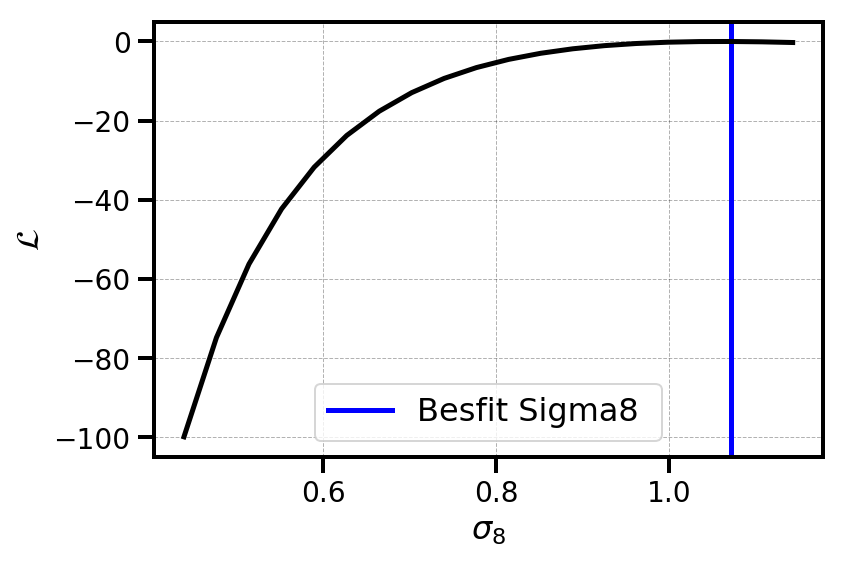

In [33]:
#Buscando qual foi o valor de h que determinou o máximo da Likelihood 
loc = np.where(logL == np.max(logL))
#print(loc)
#print(sigmaSimulados[loc])
print("O valor de h que melhor ajusta os dados é {}".format(hSample[loc]))
print("E o besfit de sigma8 é {}".format(sigmaSimulados[loc]))
plt.axvline(x = sigmaSimulados[loc], color = 'b', label = 'Besfit Sigma8 ')
plt.plot(sigmaSimulados, logL, c='k')
plt.xlabel(r'$\sigma_{8}$')
plt.ylabel(r'$\mathcal{L}$')
plt.legend()

In [ ]:
#Tentando fitar Omega_b para o mesmo sigma8 obtido através da simulação porém utilizando uma cosmologia com H0 = 73

In [34]:
OmegaB = np.linspace(0.011, 0.06, Nbins)
logL = np.empty(Nbins)
sigmaSimulados = np.empty(Nbins)
for m in range(Nbins):
    cosmo = cosmology.Cosmology(h=0.73, T0_cmb=2.7255, Omega0_b = OmegaB[m],Omega0_cdm = 0.2638,n_s = 0.9619)
    Plin = cosmology.LinearPower(cosmo, redshift, transfer='CLASS')
    sigmaSimulados[m] = Plin.sigma_r(r=8)
    ErroSigma = Plin.sigma_r(r=8)/10
    logL[m] =  -np.sum((0.5 * ((Plin.sigma_r(r=8) - SigmaMesh ) / ErroSigma) ** 2)) 

O valor de Omega Barions que melhor ajusta os dados é [0.011]
E o besfit de sigma8 é [1.06371566]


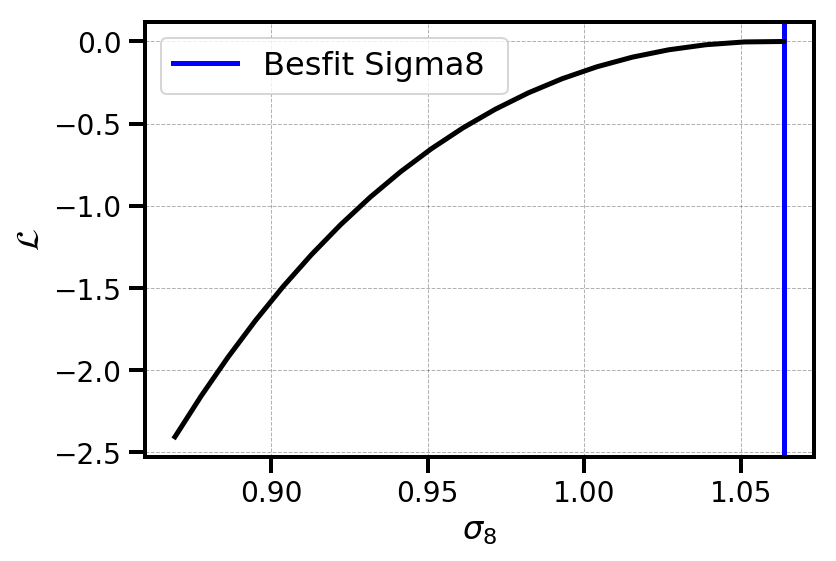

In [35]:
#Buscando qual foi o valor de OmegaB que determinou o máximo da Likelihood 
loc = np.where(logL == np.max(logL))
#print(loc)
#print(sigmaSimulados[loc])
print("O valor de Omega Barions que melhor ajusta os dados é {}".format(OmegaB[loc]))
print("E o besfit de sigma8 é {}".format(sigmaSimulados[loc]))
plt.axvline(x = sigmaSimulados[loc], color = 'b', label = 'Besfit Sigma8 ')
plt.plot(sigmaSimulados, logL, c='k')
plt.xlabel(r'$\sigma_{8}$')
plt.ylabel(r'$\mathcal{L}$')
plt.legend()